In [1]:
# Problem : Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.
# Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Telco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan
# hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

# 21 Değişken 7043 Gözlem

# CustomerId : Müşteri İd’si
# Gender : Cinsiyet
# SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure : Müşterinin şirkette kaldığı ay sayısı
# PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges : Müşteriden tahsil edilen toplam tutar
# Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler


# Her satır benzersiz bir müşteriyi temsil etmekte.
# Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
# Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
# Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
# Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı


# GÖREV 1: KEŞİFCİ VERİ ANALİZİ
           # Adım 1: Genel resmi inceleyiniz.
           # Adım 2: Numerik ve kategorik değişkenleri yakalayınız.
           # Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.
           # Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)
           # Adım 5: Aykırı gözlem analizi yapınız.
           # Adım 6: Eksik gözlem analizi yapınız.
           # Adım 7: Korelasyon analizi yapınız.

# GÖREV 2: FEATURE ENGINEERING
           # Adım 1:  Eksik ve aykırı değerler için gerekli işlemleri yapınız.
           # işlemleri uygulayabilirsiniz.
           # Adım 2: Yeni değişkenler oluşturunuz.
           # Adım 3:  Encoding işlemlerini gerçekleştiriniz.
           # Adım 4: Numerik değişkenler için standartlaştırma yapınız.
           # Adım 5: Model oluşturunuz.




In [2]:
!pip3 install catboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("Telco-Customer-Churn.csv")
def check_df(dataframe, head=5):
    print("------Shape------")
    print(dataframe.shape)
    print("-----Types-----")
    print(dataframe.dtypes)
    print("-----NA-----")
    print(dataframe.isnull().sum())
    print("-----Quantiles-----")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

------Shape------
(7043, 21)
-----Types-----
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
-----NA-----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract  

In [ ]:
df.head()

In [4]:
#TotalCharges         object
#Churn                object
#bu değerlerin numerik değerler olması için dönüştürme yapalım
#müşteri churn olmussa 1 hala müşterimiz ise 0

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [5]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [6]:
# NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI
##################################

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols
cat_but_car



Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


['customerID']

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################
     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################
     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################
     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################
                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################
             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################
                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667


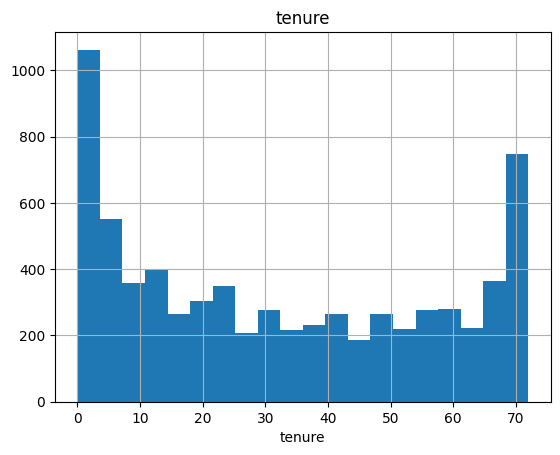

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


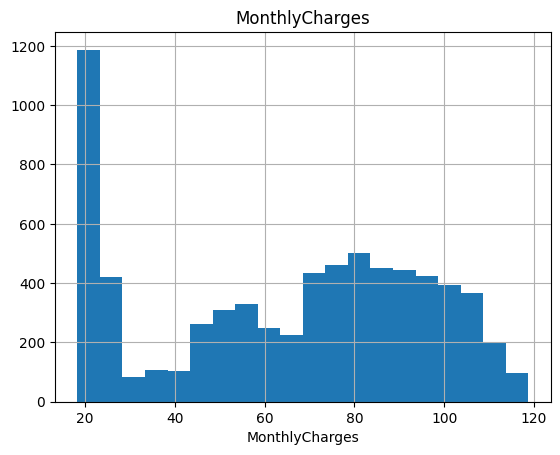

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


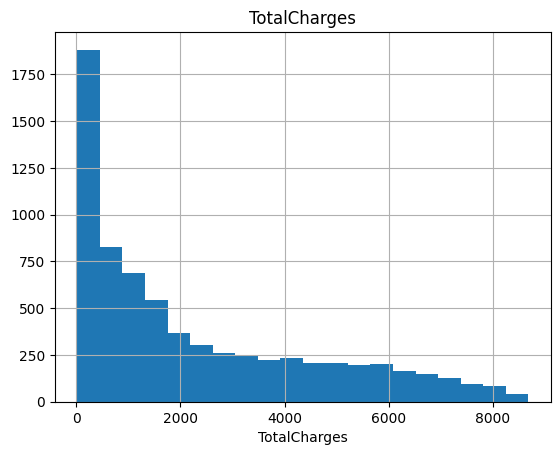

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796


gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No               

In [7]:
# KATEGORİK DEĞİŞKENLERİN ANALİZİ
##################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)




##################################
# NUMERİK DEĞİŞKENLERİN ANALİZİ
##################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)




##################################
# NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ
##################################

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)


##################################
# KATEGORİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ
##################################


def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)




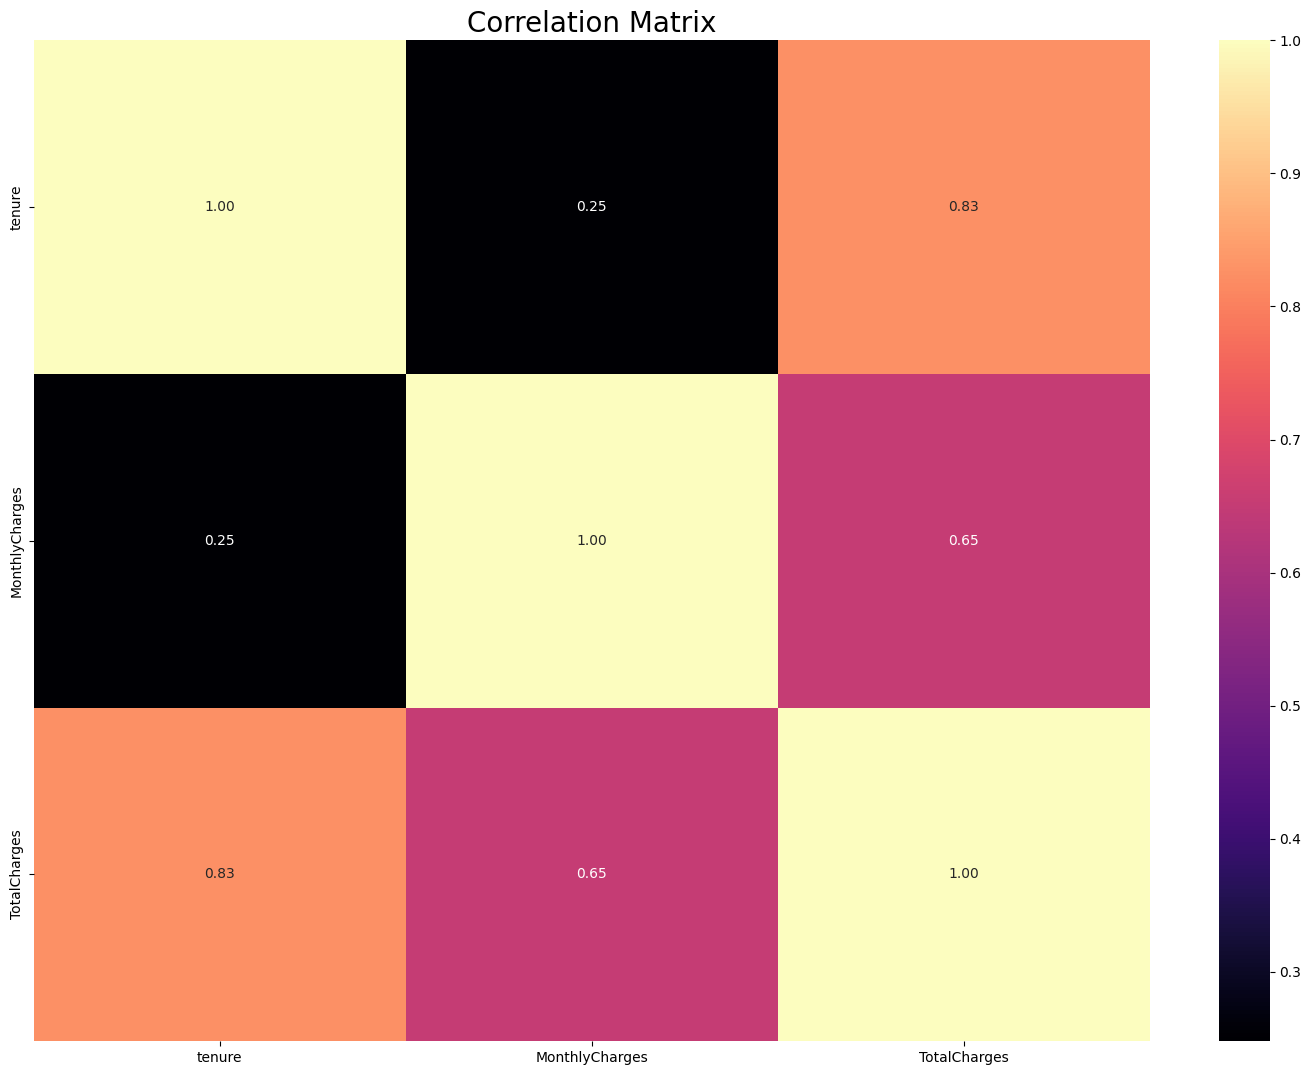

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.352
dtype: float64

In [8]:
# KORELASYON
##################################

df[num_cols].corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# TotalChargers'in aylık ücretler ve tenure ile yüksek korelasyonlu olduğu görülmekte

df.corrwith(df["Churn"]).sort_values(ascending=False)


In [9]:
# GÖREV 2: FEATURE ENGINEERING
##################################

##################################
# EKSİK DEĞER ANALİZİ
##################################

df.isnull().sum()

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)  # aylık ödenecek miktarlarıyla totalcharge doldurulailir (daya iyi olur denensin)  veya 11 değişken drop edilebilir

df.isnull().sum()



              n_miss  ratio
TotalCharges      11  0.160


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# BASE MODEL KURULUMU
##################################

dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)


y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

# Accuracy: 0.7837
# Recall: 0.6333
# Precision: 0.4843
# F1: 0.5489
# Auc: 0.7282


Accuracy: 0.7847
Recall: 0.6331
Precision: 0.493
F1: 0.5544
Auc: 0.7292


In [11]:
# AYKIRI DEĞER ANALİZİ
##################################

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [12]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

tenure False
MonthlyCharges False
TotalCharges False


In [13]:
# ÖZELLİK ÇIKARIMI
##################################

# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)


In [14]:
# ENCODING
##################################

# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()


Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,14.925,0.500,14.925,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,3,53.986,0.948,14.238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,3,36.050,0.669,13.463,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,3,40.016,0.946,10.575,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,50.550,0.715,35.350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [15]:
df["Churn"].nunique

<bound method IndexOpsMixin.nunique of 0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
30      0
31      0
32      0
33      0
34      0
35      0
36      1
37      0
38      1
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      0
50      0
51      1
52      0
53      1
54      0
55      1
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      1
81      0
82      1
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      1
9

In [16]:
# MODELLEME
##################################

y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

# Accuracy: 0.8
# Recall: 0.66
# Precision: 0.51
# F1: 0.58
# Auc: 0.75

# Base Model
# # Accuracy: 0.7837
# # Recall: 0.6333
# # Precision: 0.4843
# # F1: 0.5489
# # Auc: 0.7282



Accuracy: 0.79
Recall: 0.65
Precision: 0.5
F1: 0.56
Auc: 0.74
